#### Business Objective:
**Predict the Reliance Industries Stock Price for the next 30 days.
There are Open, High, Low and Close prices that you need to obtain from the web
for each day starting from 2015 to 2022 for Reliance Industries stock.**
* **Split the last year into a test set- to build a model to predict stock price.**
* **Find short term, &amp; long term trends.**
* **Understand how it is impacted from external factors or any big external events.**
* **Forecast for next 30 days.**
* **If there is an issue with infrastructure, then consider 2020 Jan 1st to till today** 

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from nsepy import get_history
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
import sweetviz as sv

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from keras.models import Sequential
from keras.layers import LSTM,Dropout, Dense

import warnings
warnings.filterwarnings('ignore')

C:\Users\prajn\AppData\Local\Temp\ipykernel_12188\780319022.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Scraping the data

In [2]:
start_date = date(2015,1,1)
end_date = date(2022,12,31)

#Symbol is visible in NSE website. It's like a short name given to every company
reliance = get_history(symbol ='RELIANCE',start = start_date, end = end_date)
print(reliance)

              Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                          
2015-01-01  RELIANCE     EQ      891.15   886.30   892.00   883.65   888.00   
2015-01-02  RELIANCE     EQ      887.90   888.10   896.05   884.30   884.95   
2015-01-05  RELIANCE     EQ      885.55   885.00   890.90   874.10   875.55   
2015-01-06  RELIANCE     EQ      875.85   870.00   873.00   832.00   832.50   
2015-01-07  RELIANCE     EQ      836.10   837.10   858.80   837.00   858.00   
...              ...    ...         ...      ...      ...      ...      ...   
2022-12-26  RELIANCE     EQ     2502.20  2514.75  2542.00  2492.40  2525.00   
2022-12-27  RELIANCE     EQ     2524.05  2530.00  2548.80  2515.25  2542.70   
2022-12-28  RELIANCE     EQ     2544.70  2538.00  2549.80  2521.50  2542.00   
2022-12-29  RELIANCE     EQ     2544.45  2527.00  2548.90  2525.50  2544.95   
2022-12-30  RELIANCE     EQ     2543.30  2545.10  25

In [3]:
#Converting the data to dataframe
data = pd.DataFrame(reliance)
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,RELIANCE,EQ,891.15,886.30,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227
2015-01-02,RELIANCE,EQ,887.90,888.10,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257
2015-01-05,RELIANCE,EQ,885.55,885.00,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032
2015-01-06,RELIANCE,EQ,875.85,870.00,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527
2015-01-07,RELIANCE,EQ,836.10,837.10,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,RELIANCE,EQ,2502.20,2514.75,2542.00,2492.40,2525.00,2524.05,2523.81,2764496,6.977059e+14,117927,1225057,0.4431
2022-12-27,RELIANCE,EQ,2524.05,2530.00,2548.80,2515.25,2542.70,2544.70,2534.62,2659749,6.741453e+14,138609,1246382,0.4686
2022-12-28,RELIANCE,EQ,2544.70,2538.00,2549.80,2521.50,2542.00,2544.45,2537.68,3442509,8.735979e+14,158888,1908597,0.5544


## EDA and data preprocessing

In [4]:
data=data.reset_index()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1982 non-null   object 
 1   Symbol              1982 non-null   object 
 2   Series              1982 non-null   object 
 3   Prev Close          1982 non-null   float64
 4   Open                1982 non-null   float64
 5   High                1982 non-null   float64
 6   Low                 1982 non-null   float64
 7   Last                1982 non-null   float64
 8   Close               1982 non-null   float64
 9   VWAP                1982 non-null   float64
 10  Volume              1982 non-null   int64  
 11  Turnover            1982 non-null   float64
 12  Trades              1982 non-null   int64  
 13  Deliverable Volume  1982 non-null   int64  
 14  %Deliverble         1982 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 232.4+

In [6]:
#In the info, we see that date is object data type. So converting it to the datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
#Now date is in the required format
data['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1982 entries, 0 to 1981
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1982 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.6 KB


In [8]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1.982000e+03,1.982000e+03,1.982000e+03,1.982000e+03,1982.000000
mean,1495.593971,1497.437967,1514.365439,1479.932265,1496.376615,1496.429516,1497.430954,7.739462e+06,1.231448e+15,1.892229e+05,3.328878e+06,0.478486
std,593.721756,594.501915,600.886661,587.715465,593.975223,594.035889,594.339382,6.683125e+06,1.267831e+15,1.429929e+05,2.262885e+06,0.122574
min,780.900000,791.750000,793.400000,779.100000,781.200000,780.900000,785.510000,2.995110e+05,2.781933e+13,8.723000e+03,9.803000e+04,0.114800
25%,993.250000,993.600000,1005.137500,984.162500,993.012500,993.737500,993.412500,3.732518e+06,4.036874e+14,9.139425e+04,1.909569e+06,0.398050
50%,1276.725000,1278.000000,1289.650000,1261.200000,1277.075000,1277.425000,1275.965000,5.908822e+06,8.987526e+14,1.562175e+05,2.752685e+06,0.489350
75%,2029.262500,2038.550000,2064.875000,2002.675000,2034.300000,2031.775000,2035.587500,9.309250e+06,1.580285e+15,2.329015e+05,4.042059e+06,0.564275
max,2819.850000,2856.150000,2856.150000,2786.100000,2810.000000,2819.850000,2823.910000,6.523089e+07,1.473434e+16,1.428490e+06,1.973411e+07,0.827000


In [9]:
data.isna().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [10]:
data.duplicated().sum()

0

* **No null values and no dupplicate values.**

In [11]:
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") # year extraction
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,month,year
0,2015-01-01,RELIANCE,EQ,891.15,886.30,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227,Jan,2015
1,2015-01-02,RELIANCE,EQ,887.90,888.10,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257,Jan,2015
2,2015-01-05,RELIANCE,EQ,885.55,885.00,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032,Jan,2015
3,2015-01-06,RELIANCE,EQ,875.85,870.00,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527,Jan,2015
4,2015-01-07,RELIANCE,EQ,836.10,837.10,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092,Jan,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,2022-12-26,RELIANCE,EQ,2502.20,2514.75,2542.00,2492.40,2525.00,2524.05,2523.81,2764496,6.977059e+14,117927,1225057,0.4431,Dec,2022
1978,2022-12-27,RELIANCE,EQ,2524.05,2530.00,2548.80,2515.25,2542.70,2544.70,2534.62,2659749,6.741453e+14,138609,1246382,0.4686,Dec,2022
1979,2022-12-28,RELIANCE,EQ,2544.70,2538.00,2549.80,2521.50,2542.00,2544.45,2537.68,3442509,8.735979e+14,158888,1908597,0.5544,Dec,2022
1980,2022-12-29,RELIANCE,EQ,2544.45,2527.00,2548.90,2525.50,2544.95,2543.30,2536.86,3198493,8.114145e+14,124496,1608415,0.5029,Dec,2022


In [12]:
data = data.drop(['Symbol','Series'],axis=1)
data.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,month,year
0,2015-01-01,891.15,886.3,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227,Jan,2015
1,2015-01-02,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257,Jan,2015
2,2015-01-05,885.55,885.0,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032,Jan,2015
3,2015-01-06,875.85,870.0,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527,Jan,2015
4,2015-01-07,836.10,837.1,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092,Jan,2015


In [13]:
data = data.set_index(data['Date'])

In [14]:
data['weekday_name'] = pd.to_datetime(data.index).day_name()
data.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,month,year,weekday_name
Date,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,891.15,886.3,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227,Jan,2015,Thursday
2015-01-02,2015-01-02,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257,Jan,2015,Friday
2015-01-05,2015-01-05,885.55,885.0,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032,Jan,2015,Monday
2015-01-06,2015-01-06,875.85,870.0,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527,Jan,2015,Tuesday
2015-01-07,2015-01-07,836.10,837.1,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092,Jan,2015,Wednesday


In [15]:
df = data[['Close']]
df.head()

,Close
Date,
2015-01-01,887.90
2015-01-02,885.55
2015-01-05,875.85
2015-01-06,836.10
2015-01-07,854.30


## Auto EDA Techniques

In [16]:
#pandas profiling
profile = ProfileReport(reliance,explorative=True)
#profile.to_file('output.html')

In [17]:
#sweetviz
report = sv.analyze(reliance)
#report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

## Visualising the trends

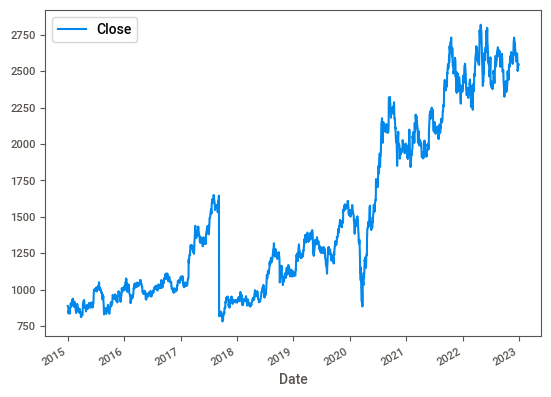

In [18]:
df.plot()
plt.show()

**Close price from 2015 to 2022 is showing uptrend**

array([[<AxesSubplot: title={'center': 'Close'}>]], dtype=object)

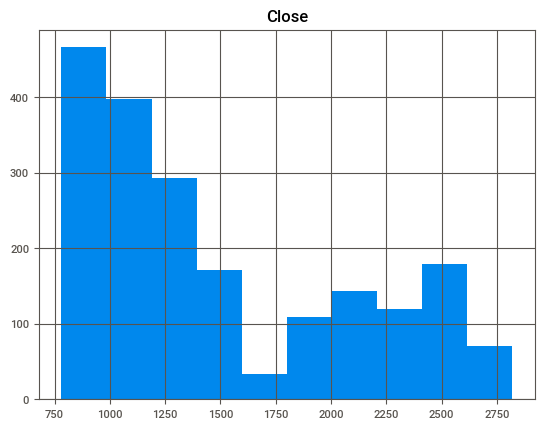

In [19]:
df.hist()

**Data is right skewed**

<AxesSubplot: ylabel='Density'>

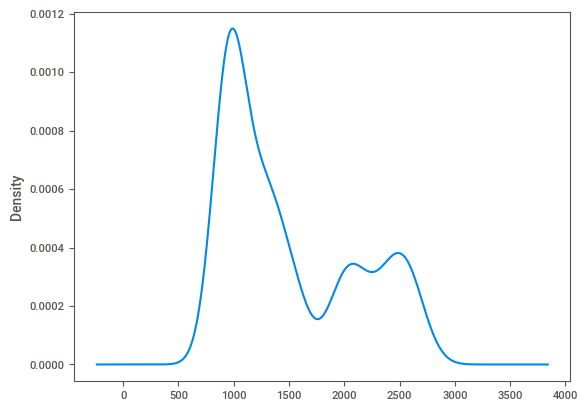

In [20]:
data['Close'].plot(kind='kde')

<AxesSubplot: xlabel='Date'>

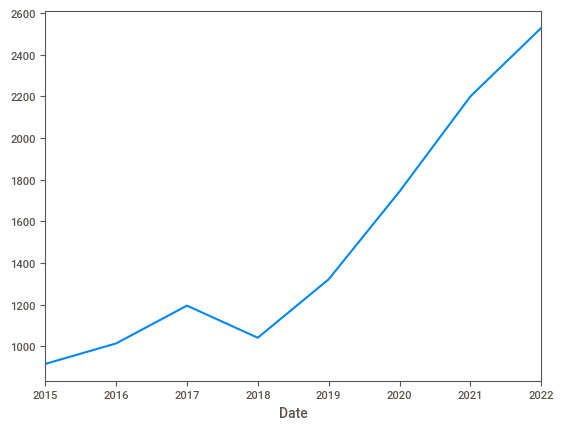

In [21]:
df.Close.resample(rule='A').mean().plot()

**Rule A shows the 'year end frequency'. So mean Close prices of all the years are plotted here.This is also showing uptrend. 2018 year has least \Close price in the year end.**

<AxesSubplot: xlabel='Date'>

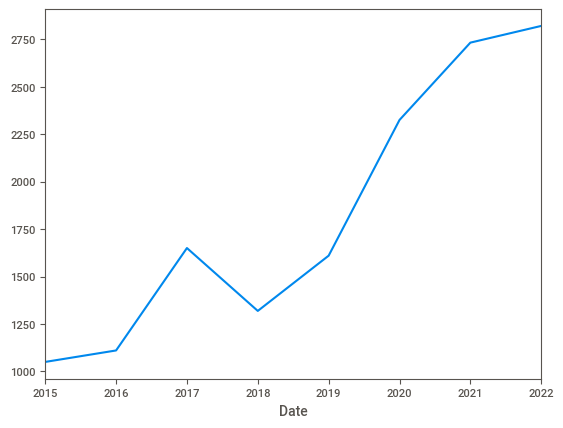

In [22]:
df.Close.resample(rule='A').max().plot()

<AxesSubplot: xlabel='Date'>

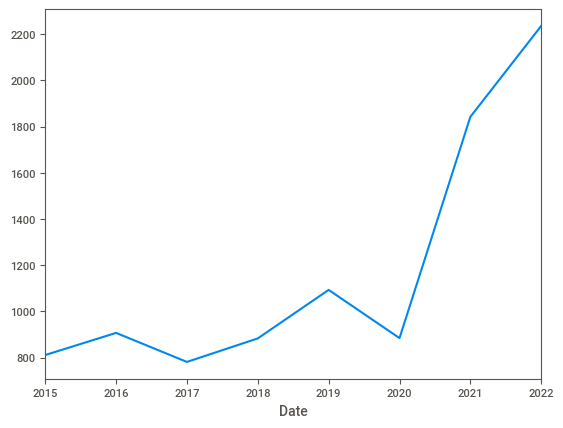

In [23]:
df.Close.resample(rule='A').min().plot()

Text(0.5, 1.0, 'Yearly trend')

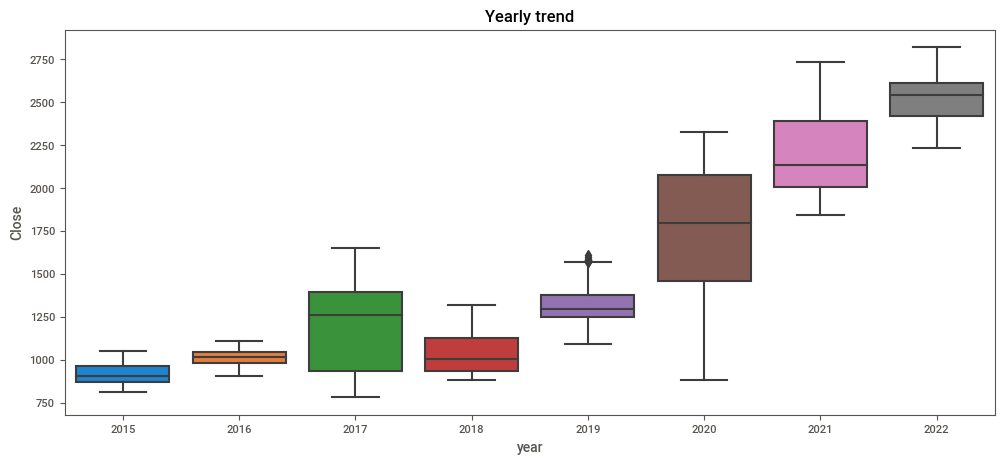

In [24]:
#Yearly trend
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = data.year,
                y = data['Close'], 
                ax = ax)
ax.set_title('Yearly trend')

**The Close price is least in the year 2015 and maximum in the year 2022**

Text(0.5, 1.0, 'Monthly trend')

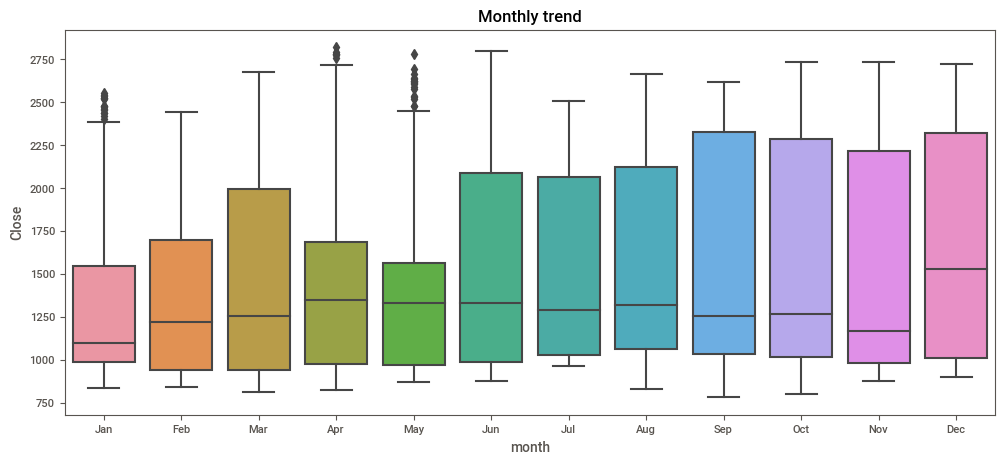

In [25]:
#Monthly trend
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = data.month,
                y = data['Close'], 
                ax = ax)
ax.set_title('Monthly trend')

**As compared to other days, the close price is maximum on Saturday**

Text(0.5, 1.0, 'Daywise trend')

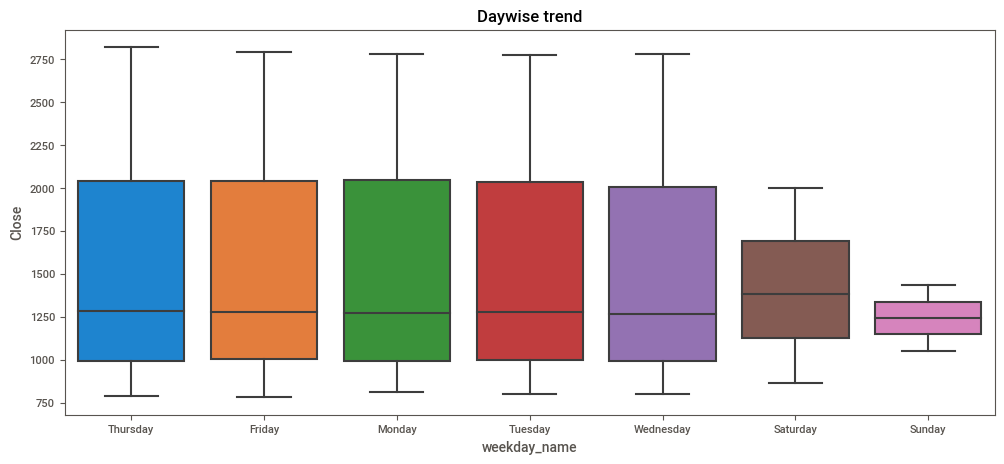

In [26]:
#Daywise trend
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = data.weekday_name,
                y = data['Close'], 
                ax = ax)
ax.set_title('Daywise trend')

**January has least close price and the December has the maximum Close price**

In [27]:
data['season']=data['month'].copy()
data['season']=data['season'].map({'Jan':'Winter','Feb':'Winter','Mar':'Winter','Apr':'Spring','May':'Spring','Jun':'Spring','Aug':'Summer','Sep':'Summer','Jul':'Summer','Oct': 'Fall','Nov': 'Fall','Dec': 'Fall'})

In [28]:
data.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,month,year,weekday_name,season
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,891.15,886.3,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227,Jan,2015,Thursday,Winter
2015-01-02,2015-01-02,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257,Jan,2015,Friday,Winter
2015-01-05,2015-01-05,885.55,885.0,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032,Jan,2015,Monday,Winter
2015-01-06,2015-01-06,875.85,870.0,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527,Jan,2015,Tuesday,Winter
2015-01-07,2015-01-07,836.10,837.1,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092,Jan,2015,Wednesday,Winter


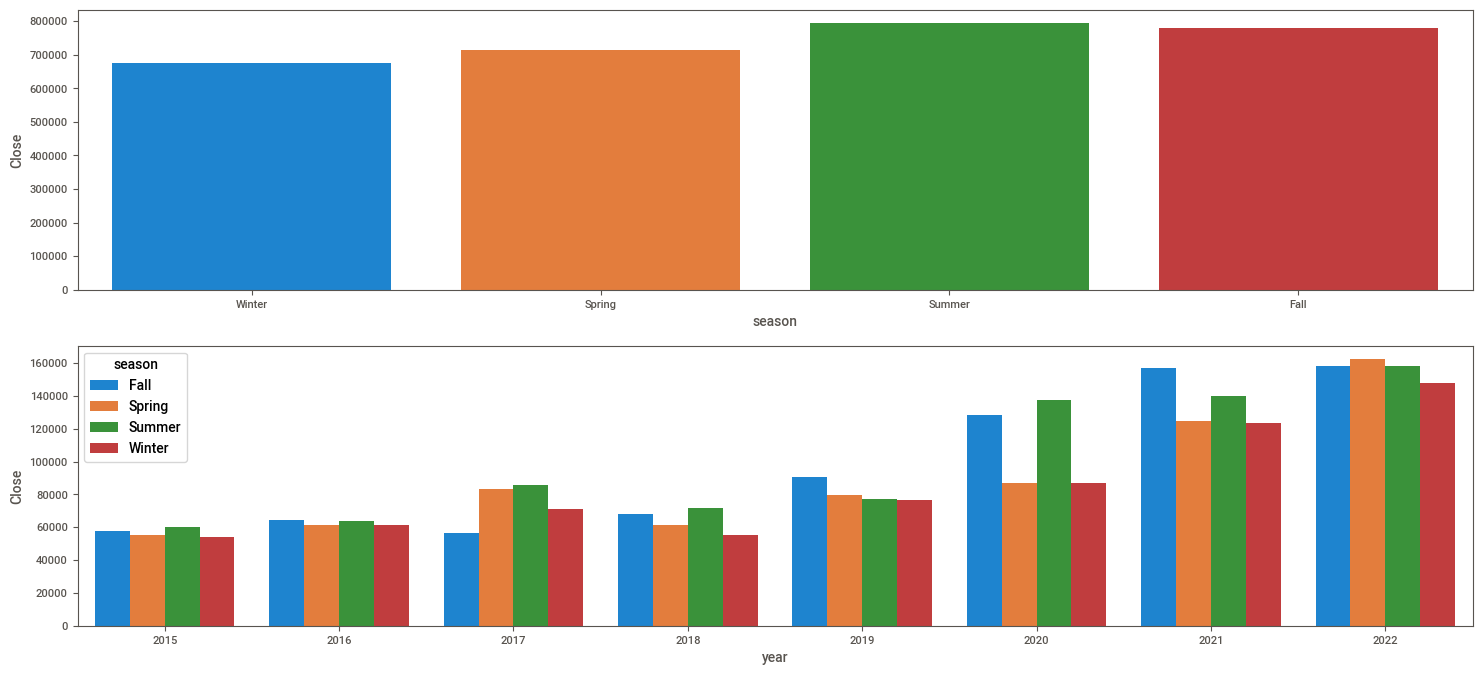

In [29]:
plt.figure(figsize=(18,8))
aux1 = data[['season', 'Close']].groupby('season').sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='season', y='Close', data=aux1, order=['Winter', 'Spring', 'Summer', 'Fall'] )

aux2 = data[['year', 'season', 'Close']].groupby( ['year', 'season'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='Close', hue='season', data=aux2 );

**For Summer season, the Close price is more as compared to others. For winter, its very low.**

### Model building

In [30]:
df.head()

,Close
Date,
2015-01-01,887.90
2015-01-02,885.55
2015-01-05,875.85
2015-01-06,836.10
2015-01-07,854.30


In [31]:
#As 2022 is having 248 trading days,taking year 2022 as test data.
train =df[0:len(df)-248]
test = df[len(df)-248:]

In [32]:
train

,Close
Date,
2015-01-01,887.90
2015-01-02,885.55
2015-01-05,875.85
2015-01-06,836.10
2015-01-07,854.30
...,...
2021-12-27,2370.25
2021-12-28,2398.40
2021-12-29,2402.50


In [33]:
test

,Close
Date,
2022-01-03,2403.85
2022-01-04,2458.10
2022-01-05,2469.60
2022-01-06,2416.50
2022-01-07,2436.00
...,...
2022-12-26,2524.05
2022-12-27,2544.70
2022-12-28,2544.45


In [34]:
scaler2 = MinMaxScaler(feature_range=(0,1))
train_array = scaler2.fit_transform(np.array(train).reshape(-1,1))

In [35]:
train_array

array([[0.05484508],
       [0.05364053],
       [0.0486686 ],
       ...,
       [0.83118481],
       [0.80893923],
       [0.813578  ]])

In [36]:
x_train = []
y_train = []

time_step = 100
for i in range(time_step , train_array.shape[0]):
    x_train.append(train_array[i-time_step:i])
    y_train.append(train_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

In [37]:
x_train.shape,y_train.shape

((1634, 100, 1), (1634,))

In [38]:
#Model
lstm_model = Sequential()
lstm_model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,
              input_shape = (x_train.shape[1] , 1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 120,activation = 'relu'))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(units = 1))

In [39]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [40]:
lstm_model.compile(optimizer='adam',loss='mean_squared_error')
lstm_model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
52/52 [==============================] - 30s 377ms/step - loss: 0.0286
Epoch 2/100
52/52 [==============================] - 16s 298ms/step - loss: 0.0055
Epoch 3/100
52/52 [==============================] - 17s 319ms/step - loss: 0.0045
Epoch 4/100
52/52 [==============================] - 16s 313ms/step - loss: 0.0042
Epoch 5/100
52/52 [==============================] - 15s 293ms/step - loss: 0.0043
Epoch 6/100
52/52 [==============================] - 16s 316ms/step - loss: 0.0055
Epoch 7/100
52/52 [==============================] - 14s 267ms/step - loss: 0.0038
Epoch 8/100
52/52 [==============================] - 15s 295ms/step - loss: 0.0029
Epoch 9/100
52/52 [==============================] - 18s 333ms/step - loss: 0.0033
Epoch 10/100
52/52 [==============================] - 16s 311ms/step - loss: 0.0031
Epoch 11/100
52/52 [==============================] - 17s 326ms/step - loss: 0.0027
Epoch 12/100
52/52 [==============================] - 14s 273ms/step - loss: 0.0030
E

In [41]:
test

,Close
Date,
2022-01-03,2403.85
2022-01-04,2458.10
2022-01-05,2469.60
2022-01-06,2416.50
2022-01-07,2436.00
...,...
2022-12-26,2524.05
2022-12-27,2544.70
2022-12-28,2544.45


In [42]:
past_100_days = train.tail(100)

In [43]:
final_df = past_100_days.append(test)
final_df

,Close
Date,
2021-08-09,2077.15
2021-08-10,2088.05
2021-08-11,2117.30
2021-08-12,2110.50
2021-08-13,2145.65
...,...
2022-12-26,2524.05
2022-12-27,2544.70
2022-12-28,2544.45


In [44]:
input_data = scaler2.fit_transform(np.array(final_df).reshape(-1,1))
input_data

array([[0.        ],
       [0.01467618],
       [0.05405951],
       [0.04490373],
       [0.09223105],
       [0.12972937],
       [0.11727481],
       [0.12858489],
       [0.09573179],
       [0.11471657],
       [0.14346304],
       [0.16891073],
       [0.20640905],
       [0.20230241],
       [0.25999731],
       [0.2437054 ],
       [0.25575603],
       [0.2925138 ],
       [0.41921368],
       [0.46916655],
       [0.48976707],
       [0.47690858],
       [0.46916655],
       [0.39639154],
       [0.39221758],
       [0.40548001],
       [0.4726673 ],
       [0.42197388],
       [0.42709035],
       [0.44102599],
       [0.4757641 ],
       [0.55574256],
       [0.5460482 ],
       [0.60226202],
       [0.63403797],
       [0.60683991],
       [0.59526054],
       [0.60125219],
       [0.64494412],
       [0.71637269],
       [0.64992595],
       [0.66682375],
       [0.79991921],
       [0.77487545],
       [0.795274  ],
       [0.83182981],
       [0.8391679 ],
       [0.848

In [45]:
input_data.shape

(348, 1)

In [46]:
x_test = []
y_test = []

time_step = 100
for i in range(time_step , input_data.shape[0]):
    x_test.append(input_data[i-time_step:i])
    y_test.append(input_data[i,0])
    
x_test,y_test = np.array(x_test),np.array(y_test)

In [47]:
x_test.shape , y_test.shape

((248, 100, 1), (248,))

In [49]:
y_pred = lstm_model.predict(x_test)

8/8 [==============================] - 2s 112ms/step


In [50]:
y_pred.shape

(248, 1)

In [51]:
y_pred = scaler2.inverse_transform(y_pred)

In [52]:
y_test = scaler2.inverse_transform(y_test.reshape(-1,1))

In [53]:
test['lstm_pred'] = y_pred
test

,Close,lstm_pred
Date,,
2022-01-03,2403.85,2371.496338
2022-01-04,2458.10,2376.757324
2022-01-05,2469.60,2387.352051
2022-01-06,2416.50,2401.713623
2022-01-07,2436.00,2411.672119
...,...,...
2022-12-26,2524.05,2538.432129
2022-12-27,2544.70,2531.593750
2022-12-28,2544.45,2533.575195


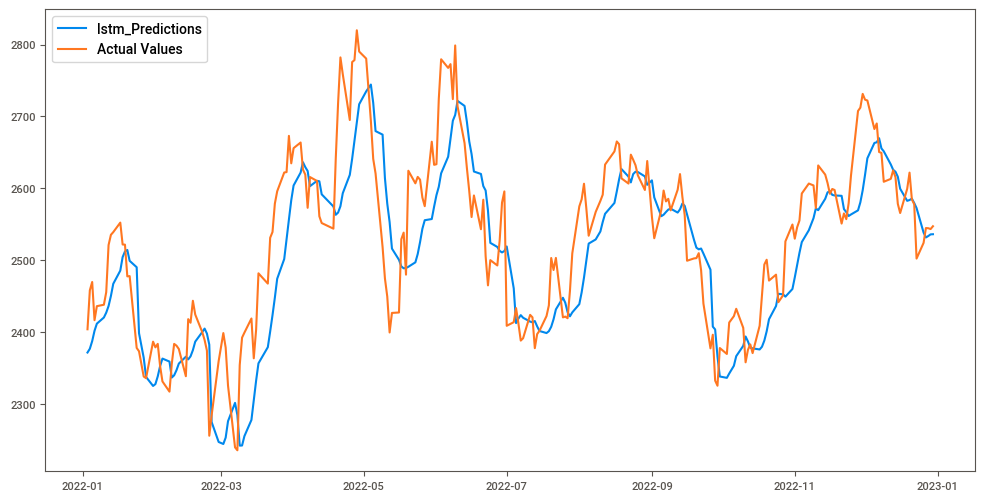

In [54]:
plt.figure(figsize=(12,6))
plt.plot(test['lstm_pred'],label='lstm_Predictions')
plt.plot(test['Close'],label='Actual Values')
plt.legend(loc="upper left")
plt.show()

In [55]:
RMSE_lstm=sqrt(mean_squared_error(y_pred,y_test))
RMSE_lstm

69.91794209340758

In [56]:
lstm_model.save('lstm.h5')

### Regression models

In [57]:
df.head()

,Close
Date,
2015-01-01,887.90
2015-01-02,885.55
2015-01-05,875.85
2015-01-06,836.10
2015-01-07,854.30


In [58]:
df1 = df.copy()
df1

,Close
Date,
2015-01-01,887.90
2015-01-02,885.55
2015-01-05,875.85
2015-01-06,836.10
2015-01-07,854.30
...,...
2022-12-26,2524.05
2022-12-27,2544.70
2022-12-28,2544.45


In [59]:
df1['Close_1dayback'] = df1['Close'].shift(+1)
df1['Close_2dayback'] = df1['Close'].shift(+2)
df1['Close_3dayback'] = df1['Close'].shift(+3)
df1['Close_4dayback'] = df1['Close'].shift(+4)
df1['Close_5dayback'] = df1['Close'].shift(+5)
df1['Close_6dayback'] = df1['Close'].shift(+6)
df1['Close_7dayback'] = df1['Close'].shift(+7)
df1['Close_8dayback'] = df1['Close'].shift(+8)

df1.head()

,Close,Close_1dayback,Close_2dayback,Close_3dayback,Close_4dayback,Close_5dayback,Close_6dayback,Close_7dayback,Close_8dayback
Date,,,,,,,,,
2015-01-01,887.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,885.55,887.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,875.85,885.55,887.90,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,836.10,875.85,885.55,887.90,NaN,NaN,NaN,NaN,NaN
2015-01-07,854.30,836.10,875.85,885.55,887.9,NaN,NaN,NaN,NaN


In [60]:
df1 = df1.dropna()
df1

,Close,Close_1dayback,Close_2dayback,Close_3dayback,Close_4dayback,Close_5dayback,Close_6dayback,Close_7dayback,Close_8dayback
Date,,,,,,,,,
2015-01-13,843.15,850.30,860.30,842.05,854.30,836.10,875.85,885.55,887.90
2015-01-14,834.95,843.15,850.30,860.30,842.05,854.30,836.10,875.85,885.55
2015-01-15,864.25,834.95,843.15,850.30,860.30,842.05,854.30,836.10,875.85
2015-01-16,869.70,864.25,834.95,843.15,850.30,860.30,842.05,854.30,836.10
2015-01-19,879.65,869.70,864.25,834.95,843.15,850.30,860.30,842.05,854.30
...,...,...,...,...,...,...,...,...,...
2022-12-26,2524.05,2502.20,2577.80,2584.50,2621.80,2599.30,2565.60,2578.35,2615.50
2022-12-27,2544.70,2524.05,2502.20,2577.80,2584.50,2621.80,2599.30,2565.60,2578.35
2022-12-28,2544.45,2544.70,2524.05,2502.20,2577.80,2584.50,2621.80,2599.30,2565.60


In [61]:
x1,x2,x3,x4,x5,x6,x7,y=df1['Close_1dayback'],df1['Close_2dayback'],df1['Close_3dayback'],df1['Close_4dayback'],df1['Close_5dayback'],df1['Close_6dayback'],df1['Close_7dayback'],df1['Close']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)
print(final_x)

[[ 850.3   860.3   842.05 ...  836.1   875.85  885.55]
 [ 843.15  850.3   860.3  ...  854.3   836.1   875.85]
 [ 834.95  843.15  850.3  ...  842.05  854.3   836.1 ]
 ...
 [2544.7  2524.05 2502.2  ... 2584.5  2621.8  2599.3 ]
 [2544.45 2544.7  2524.05 ... 2577.8  2584.5  2621.8 ]
 [2543.3  2544.45 2544.7  ... 2502.2  2577.8  2584.5 ]]


In [62]:
final_x_scaled = scaler2.fit_transform((final_x))
final_x_scaled

array([[0.03403713, 0.03894161, 0.02999093, ..., 0.02707276, 0.04656809,
        0.05132544],
       [0.03053042, 0.03403713, 0.03894161, ..., 0.03599892, 0.02707276,
        0.04656809],
       [0.02650874, 0.03053042, 0.03403713, ..., 0.02999093, 0.03599892,
        0.02707276],
       ...,
       [0.86505309, 0.85492533, 0.84420903, ..., 0.88457294, 0.90286667,
        0.89183158],
       [0.86493048, 0.86505309, 0.85492533, ..., 0.88128694, 0.88457294,
        0.90286667],
       [0.86436646, 0.86493048, 0.86505309, ..., 0.84420903, 0.88128694,
        0.88457294]])

In [63]:
y

array([[ 843.15],
       [ 834.95],
       [ 864.25],
       ...,
       [2544.45],
       [2543.3 ],
       [2547.2 ]])

In [64]:
y = scaler2.fit_transform(y)
y

array([[0.03053042],
       [0.02650874],
       [0.04087888],
       ...,
       [0.86493048],
       [0.86436646],
       [0.86627921]])

In [65]:
#We split 20% of the total data into test data
x_train_reg,x_test_reg,y_train_reg,y_test_reg = final_x[:-248],final_x[-248:],y[:-248],y[-248:]

In [66]:
x_train_reg.shape,y_train_reg.shape,x_test_reg.shape,y_test_reg.shape

((1726, 7), (1726, 1), (248, 7), (248, 1))

### Linear Regression model

In [67]:
lr = LinearRegression().fit(x_train_reg, y_train_reg)
y_pred_lr = lr.predict(x_test_reg)
print("Train score : ", lr.score(x_train_reg, y_train_reg))
print("Validation score : ", lr.score(x_test_reg, y_test_reg))

Train score :  0.9953077040458322
Validation score :  0.8773900772532129


In [68]:
y_pred_lr = scaler2.inverse_transform(y_pred_lr)
y_test_reg_rescaled = scaler2.inverse_transform(y_test_reg)

In [69]:
test['lr_pred'] = y_pred_lr
test

,Close,lstm_pred,lr_pred
Date,,,
2022-01-03,2403.85,2371.496338,2366.252418
2022-01-04,2458.10,2376.757324,2405.058426
2022-01-05,2469.60,2387.352051,2458.684583
2022-01-06,2416.50,2401.713623,2468.256380
2022-01-07,2436.00,2411.672119,2414.979419
...,...,...,...
2022-12-26,2524.05,2538.432129,2502.396846
2022-12-27,2544.70,2531.593750,2523.463479
2022-12-28,2544.45,2533.575195,2545.869250


<Figure size 1200x600 with 0 Axes>

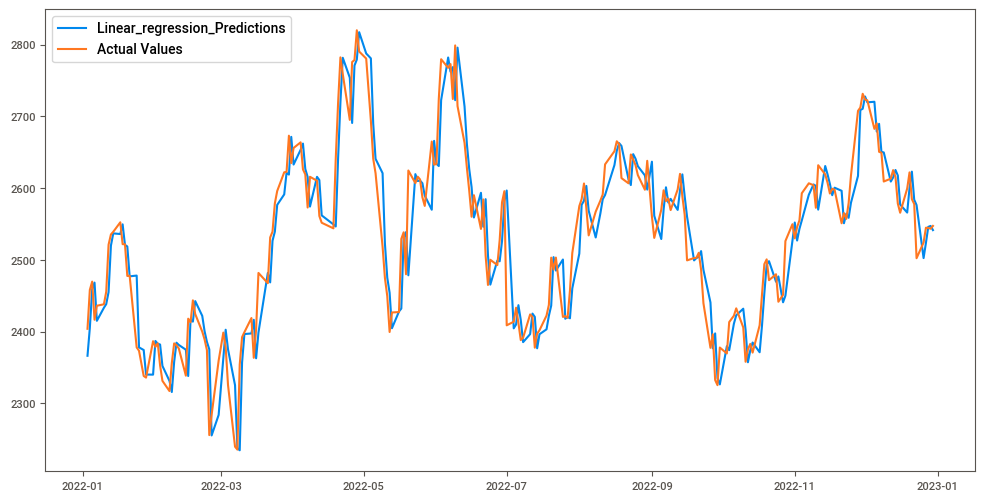

In [70]:
plt.figure(figsize=(12,6))
plt.figure(figsize=(12,6))
plt.plot(test['lr_pred'],label='Linear_regression_Predictions')
plt.plot(test['Close'],label='Actual Values')
plt.legend(loc="upper left")
plt.show()

In [71]:
RMSE_lr=sqrt(mean_squared_error(y_pred_lr,y_test_reg_rescaled))
RMSE_lr

42.01987730607579

### Decision tree regressor

In [72]:
dt = DecisionTreeRegressor(criterion='mae', random_state=0).fit(x_train_reg, y_train_reg)
y_pred_dt = dt.predict(x_test_reg)
print("Train score : ", dt.score(x_train_reg, y_train_reg))
print("Validation score : ", dt.score(x_test_reg, y_test_reg))

Train score :  1.0
Validation score :  0.6691956435387821


In [73]:
y_pred_dt = scaler2.inverse_transform((y_pred_dt).reshape(-1,1))

In [74]:
test['dt_pred'] = y_pred_dt
test

,Close,lstm_pred,lr_pred,dt_pred
Date,,,,
2022-01-03,2403.85,2371.496338,2366.252418,2368.15
2022-01-04,2458.10,2376.757324,2405.058426,2359.10
2022-01-05,2469.60,2387.352051,2458.684583,2458.95
2022-01-06,2416.50,2401.713623,2468.256380,2412.60
2022-01-07,2436.00,2411.672119,2414.979419,2380.15
...,...,...,...,...
2022-12-26,2524.05,2538.432129,2502.396846,2483.60
2022-12-27,2544.70,2531.593750,2523.463479,2549.90
2022-12-28,2544.45,2533.575195,2545.869250,2523.70


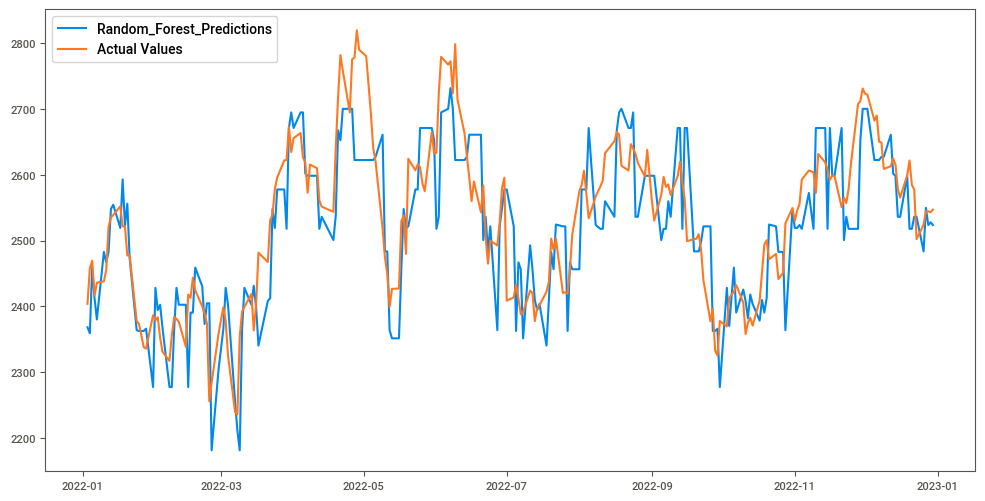

In [75]:
plt.figure(figsize=(12,6))
plt.plot(test['dt_pred'],label='Random_Forest_Predictions')
plt.plot(test['Close'],label='Actual Values')
plt.legend(loc="upper left")
plt.show()

In [76]:
RMSE_dt=sqrt(mean_squared_error(y_pred_dt,y_test_reg_rescaled))
RMSE_dt

69.02041729830569

### Random Forest regressor

In [77]:
rf = RandomForestRegressor(criterion='mae', random_state=0).fit(x_train_reg, y_train_reg)
y_pred_rf = rf.predict(x_test_reg)
print("Train score : ", rf.score(x_train_reg, y_train_reg))
print("Validation score : ", rf.score(x_test_reg, y_test_reg))

Train score :  0.999145005247957
Validation score :  0.8319372694485839


In [78]:
y_pred_rf = scaler2.inverse_transform((y_pred_rf).reshape(-1,1))

In [79]:
test['rf_pred'] = y_pred_rf
test

,Close,lstm_pred,lr_pred,dt_pred,rf_pred
Date,,,,,
2022-01-03,2403.85,2371.496338,2366.252418,2368.15,2380.1995
2022-01-04,2458.10,2376.757324,2405.058426,2359.10,2404.7800
2022-01-05,2469.60,2387.352051,2458.684583,2458.95,2429.8320
2022-01-06,2416.50,2401.713623,2468.256380,2412.60,2427.8675
2022-01-07,2436.00,2411.672119,2414.979419,2380.15,2397.4705
...,...,...,...,...,...
2022-12-26,2524.05,2538.432129,2502.396846,2483.60,2500.2245
2022-12-27,2544.70,2531.593750,2523.463479,2549.90,2543.0580
2022-12-28,2544.45,2533.575195,2545.869250,2523.70,2543.8855


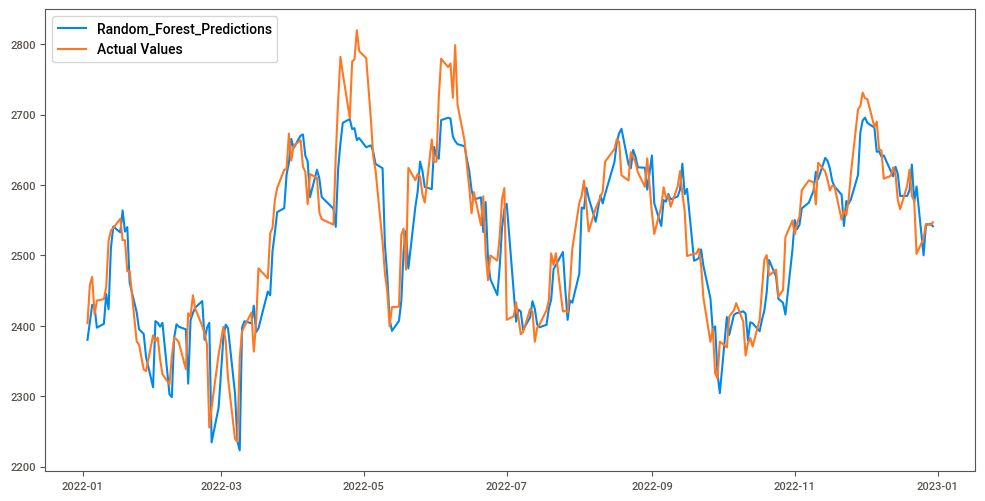

In [80]:
plt.figure(figsize=(12,6))
plt.plot(test['rf_pred'],label='Random_Forest_Predictions')
plt.plot(test['Close'],label='Actual Values')
plt.legend(loc="upper left")
plt.show()

In [81]:
RMSE_rf=sqrt(mean_squared_error(y_pred_rf,y_test_reg_rescaled))
RMSE_rf

49.19576046413094

### Gradient boost

In [82]:
Gb = GradientBoostingRegressor(criterion='mae', random_state=0).fit(x_train_reg, y_train_reg)
y_pred_Gb = Gb.predict(x_test_reg)
print("Train score : ", Gb.score(x_train_reg, y_train_reg))
print("Validation score : ", Gb.score(x_test_reg, y_test_reg))

Train score :  0.9962713122814794
Validation score :  0.8077022205903027


In [83]:
y_pred_Gb = scaler2.inverse_transform((y_pred_Gb).reshape(-1,1))

In [84]:
test['gb_pred'] = y_pred_Gb
test

,Close,lstm_pred,lr_pred,dt_pred,rf_pred,gb_pred
Date,,,,,,
2022-01-03,2403.85,2371.496338,2366.252418,2368.15,2380.1995,2386.491633
2022-01-04,2458.10,2376.757324,2405.058426,2359.10,2404.7800,2409.117202
2022-01-05,2469.60,2387.352051,2458.684583,2458.95,2429.8320,2431.012830
2022-01-06,2416.50,2401.713623,2468.256380,2412.60,2427.8675,2431.887499
2022-01-07,2436.00,2411.672119,2414.979419,2380.15,2397.4705,2426.441965
...,...,...,...,...,...,...
2022-12-26,2524.05,2538.432129,2502.396846,2483.60,2500.2245,2495.779493
2022-12-27,2544.70,2531.593750,2523.463479,2549.90,2543.0580,2536.025758
2022-12-28,2544.45,2533.575195,2545.869250,2523.70,2543.8855,2536.025758


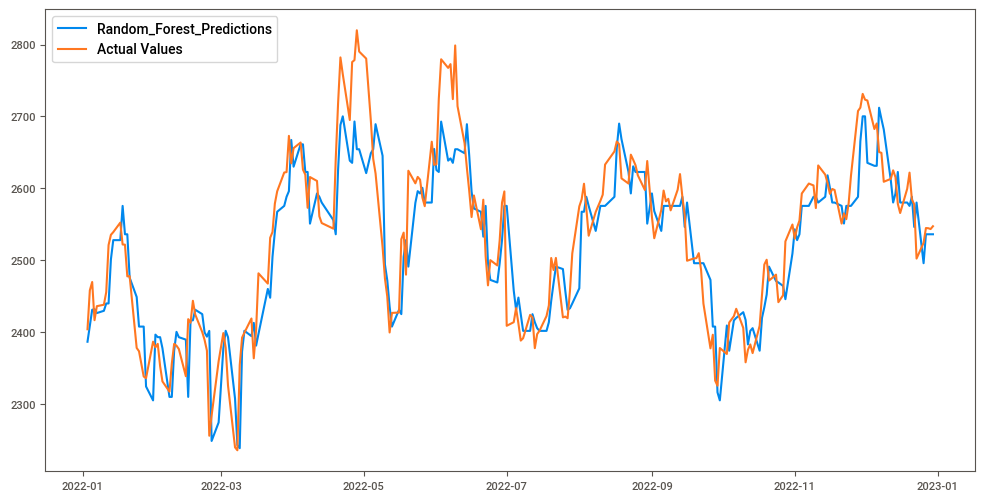

In [85]:
plt.figure(figsize=(12,6))
plt.plot(test['gb_pred'],label='Random_Forest_Predictions')
plt.plot(test['Close'],label='Actual Values')
plt.legend(loc="upper left")
plt.show()

In [86]:
RMSE_gb=sqrt(mean_squared_error(y_pred_Gb,y_test_reg_rescaled))
RMSE_gb

52.62342432211136

### XG Boost

In [87]:
xgb = XGBRegressor().fit(x_train_reg,y_train_reg)
y_pred_Xgb = xgb.predict(x_test_reg)
print("Train score : ", xgb.score(x_train_reg, y_train_reg))
print("Validation score : ", xgb.score(x_test_reg, y_test_reg))

Train score :  0.9998400251770478
Validation score :  0.7823949559452327


In [88]:
y_pred_Xgb = scaler2.inverse_transform((y_pred_Xgb).reshape(-1,1))

In [89]:
test['xgb_pred'] = y_pred_Xgb
test

,Close,lstm_pred,lr_pred,dt_pred,rf_pred,gb_pred,xgb_pred
Date,,,,,,,
2022-01-03,2403.85,2371.496338,2366.252418,2368.15,2380.1995,2386.491633,2404.340088
2022-01-04,2458.10,2376.757324,2405.058426,2359.10,2404.7800,2409.117202,2411.471924
2022-01-05,2469.60,2387.352051,2458.684583,2458.95,2429.8320,2431.012830,2434.165771
2022-01-06,2416.50,2401.713623,2468.256380,2412.60,2427.8675,2431.887499,2408.360352
2022-01-07,2436.00,2411.672119,2414.979419,2380.15,2397.4705,2426.441965,2398.999756
...,...,...,...,...,...,...,...
2022-12-26,2524.05,2538.432129,2502.396846,2483.60,2500.2245,2495.779493,2490.604492
2022-12-27,2544.70,2531.593750,2523.463479,2549.90,2543.0580,2536.025758,2534.668945
2022-12-28,2544.45,2533.575195,2545.869250,2523.70,2543.8855,2536.025758,2520.411133


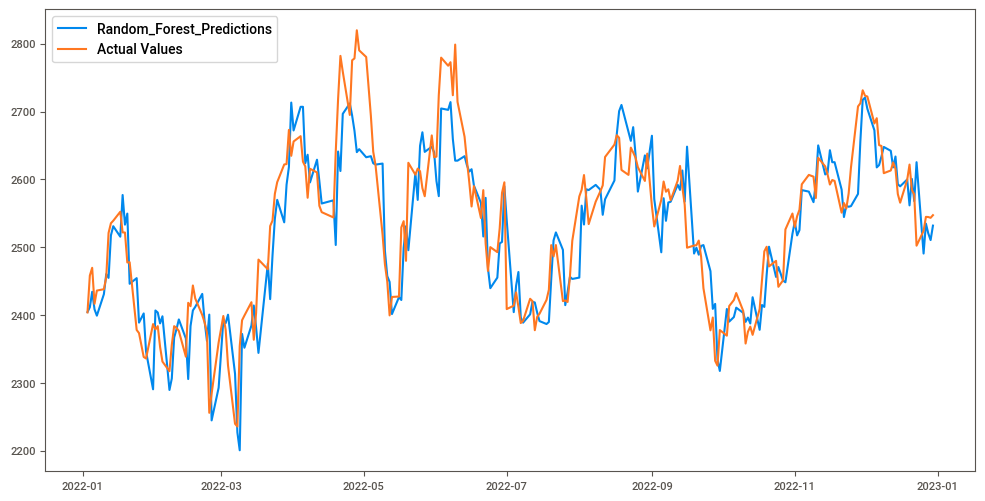

In [90]:
plt.figure(figsize=(12,6))
plt.plot(test['xgb_pred'],label='Random_Forest_Predictions')
plt.plot(test['Close'],label='Actual Values')
plt.legend(loc="upper left")
plt.show()

In [91]:
RMSE_Xgb=sqrt(mean_squared_error(y_pred_Xgb,y_test_reg_rescaled))
RMSE_Xgb

55.979177296719826

### ARIMA

In [92]:
df3 = df.copy()
df3.head()

,Close
Date,
2015-01-01,887.90
2015-01-02,885.55
2015-01-05,875.85
2015-01-06,836.10
2015-01-07,854.30


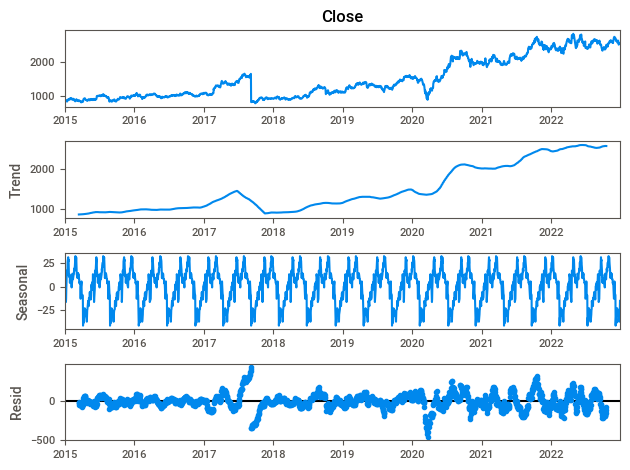

In [93]:
#Decomposition
decompose = seasonal_decompose(df3.Close,period=100)
decompose.plot()
plt.show()

**Observation:**
* **The data is showing uptrend.**
* **The data is seasonal**
* **Residuals are not showing any particular pattern**

In [94]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,1974.340312,0.0


**Since lb value is less than 0.05, residuals are uncorrelated.**

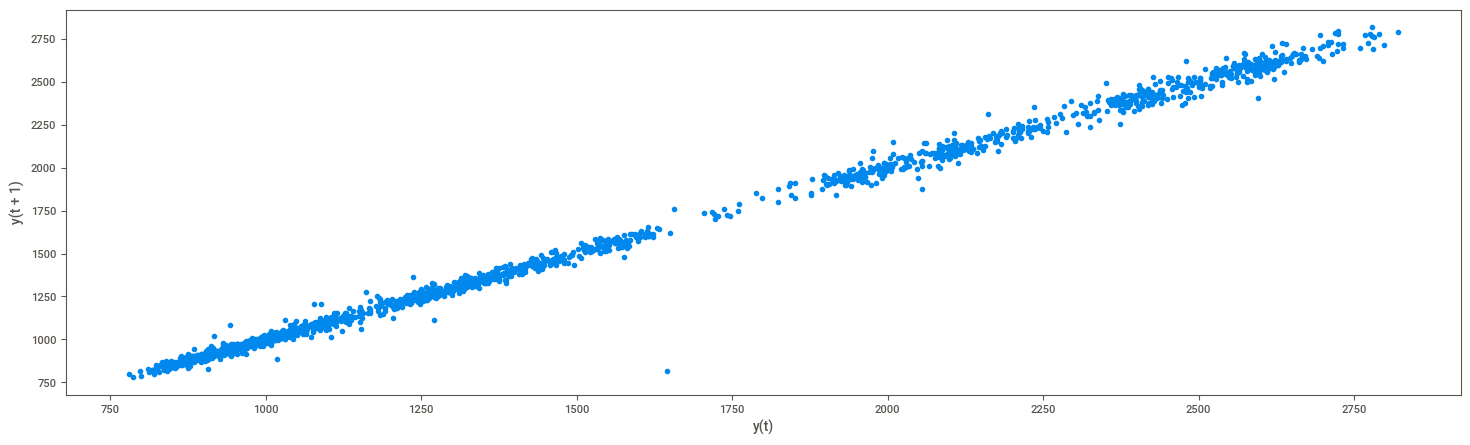

In [95]:
from pandas.plotting import lag_plot
plt.figure(figsize=(18,5))
lag_plot(df.Close)
plt.show()

**A lag plot is used to help evaluate whether the values in the dataset or time series are random.Here as the data are showing identifiable pattern, we can say data are not random.**

In [96]:
train_ar =df3[0:len(df3)-248]
test_ar = df3[len(df3)-248:]

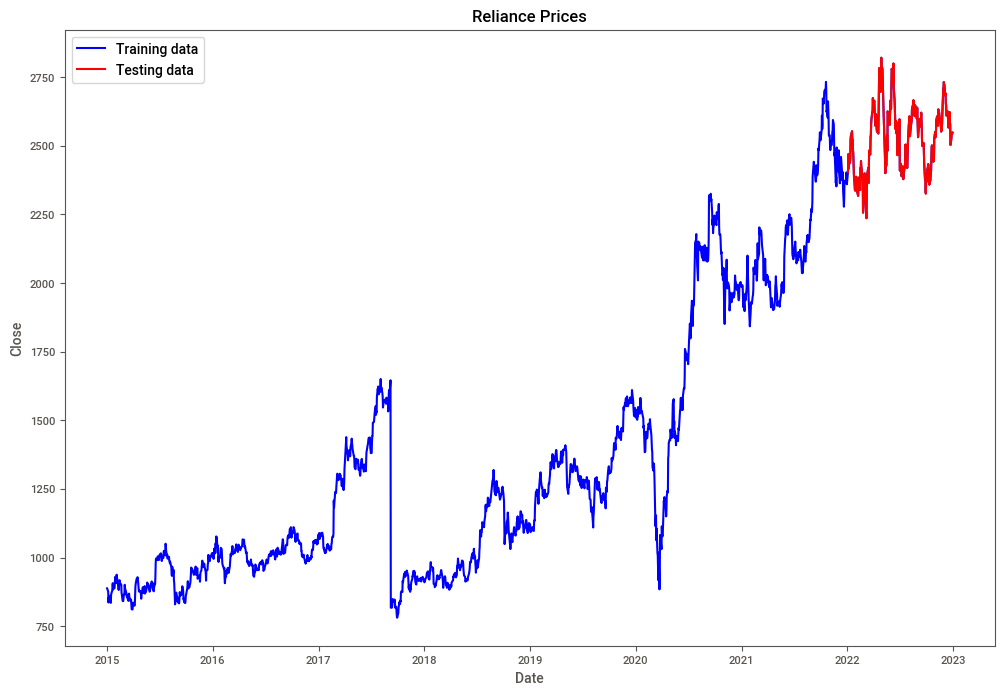

In [97]:
plt.figure(figsize=(12,8))
plt.title('Reliance Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df3['Close'],'blue',label = 'Training data')
plt.plot(test_ar['Close'],'red',label='Testing data')
plt.legend()

In [98]:
#Augumented dickey fuller test
#Ho = It is non Srationary
#Ha = It is Stationary

def adfuller_test(price):
    result = adfuller(price)
    labels = ['ADF Test Statistic','p-value','#lags Used','Number of observations Used']
    for value,label in zip(result,labels):
        print(label + ' : ' +str(value))
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis,time series has a unit root indicating it is non-stationary")

In [99]:
adfuller_test(df3['Close'])

ADF Test Statistic : -0.8634806423524892
p-value : 0.7997608244164502
#lags Used : 0
Number of observations Used : 1981
Weak evidence against the null hypothesis,time series has a unit root indicating it is non-stationary


**As the data is non stationary, We need to transform the data to make it stationary**

In [100]:
df3['Close_first_diff']=df3['Close']-df3['Close'].shift(1)
adfuller_test(df3['Close_first_diff'].dropna())

ADF Test Statistic : -43.95652612388176
p-value : 0.0
#lags Used : 0
Number of observations Used : 1980
Strong evidence against the null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


**Now the data is stationary**

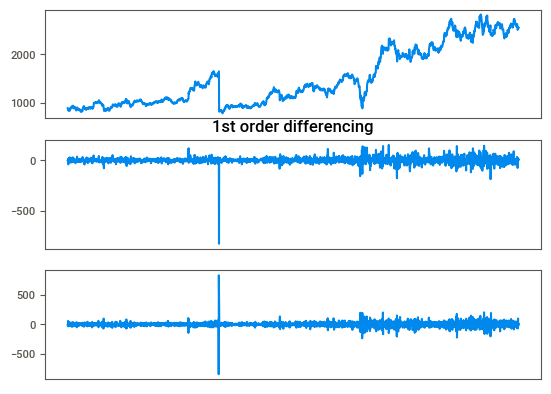

In [101]:
fig,(ax1,ax2,ax3) = plt.subplots(3)
ax1.plot(df3.Close)
ax1.axes.xaxis.set_visible(False)

#1st differencing
ax2.plot(df3.Close.diff())
ax2.set_title('1st order differencing')
ax2.axes.xaxis.set_visible(False)

#2nd differencing
ax3.plot(df3.Close.diff().diff())
ax3.axes.xaxis.set_visible(False)

plt.show()

**As first order differencing has less noice, d=1**

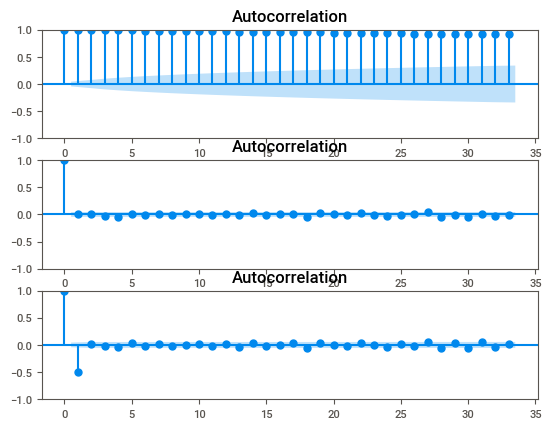

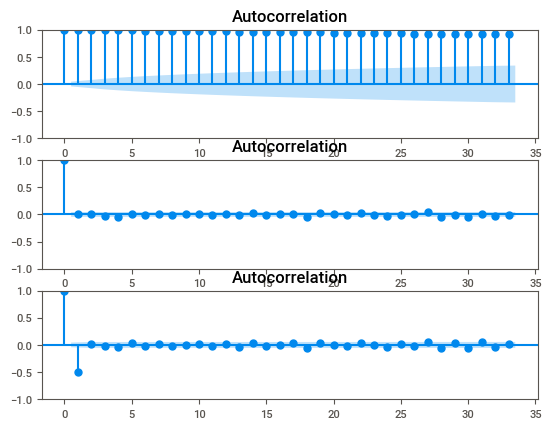

In [102]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df3.Close, ax=ax1)
plot_acf(df3.Close.diff().dropna(), ax=ax2)
plot_acf(df3.Close.diff().diff().dropna(), ax=ax3)

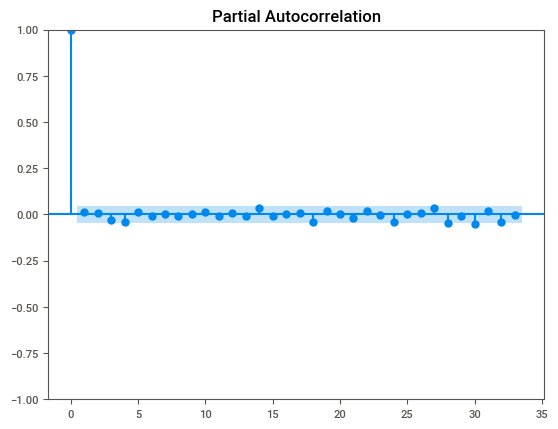

<Figure size 2000x1500 with 0 Axes>

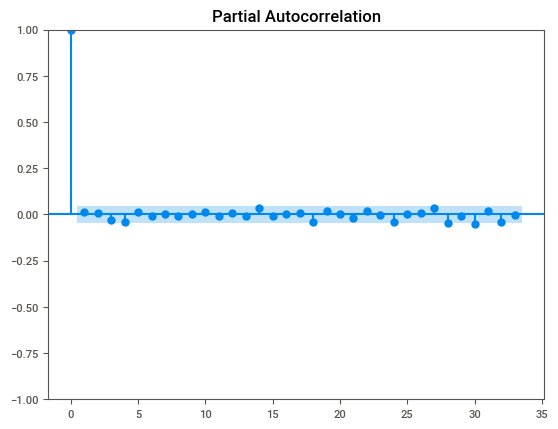

In [103]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize = (20,15))
plot_pacf(df3.Close.diff().dropna())

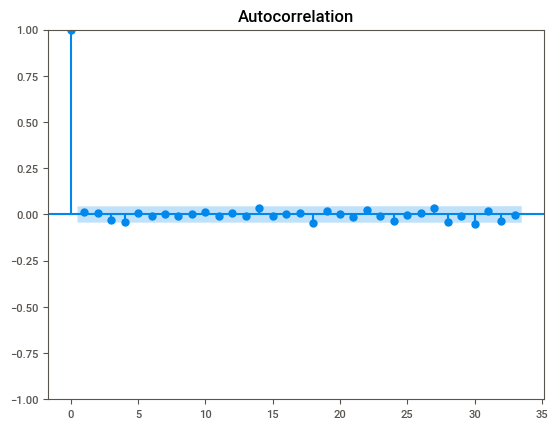

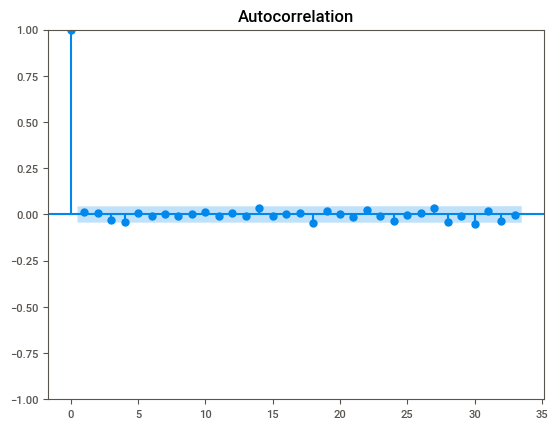

In [104]:
plot_acf(df3.Close.diff().dropna())

**Therefore, p=1 and q=1**

In [105]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
model = smapi.tsa.arima.ARIMA(train_ar.Close, order = (1,2,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1734
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -8498.303
Date:                Wed, 15 Mar 2023   AIC                          17002.607
Time:                        12:06:58   BIC                          17018.978
Sample:                             0   HQIC                         17008.662
                               - 1734                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0024      0.026      0.091      0.927      -0.049       0.054
ma.L1         -1.0000      0.085    -11.716      0.000      -1.167      -0.833
sigma2      1065.4306     90.745     11.741      0.000     887.574    1243.287
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           4194792.07
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.28   Skew:                            -9.34
Prob(H) (two-sided):                  0.00   Kurtosis:                       243.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
train_R = train_ar['Close'].values
test_R = test_ar['Close'].values

history = [x for x in train_R]
print(type(history))
predictions = list()
for t in range(len(test_R)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_R[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

<class 'list'>


In [107]:
error = mean_squared_error(test_R, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = sqrt(mean_squared_error(test_R, predictions))
print('RMSE:%.3f'% error2)

Testing Mean Squared Error: 1767.165
RMSE:42.038


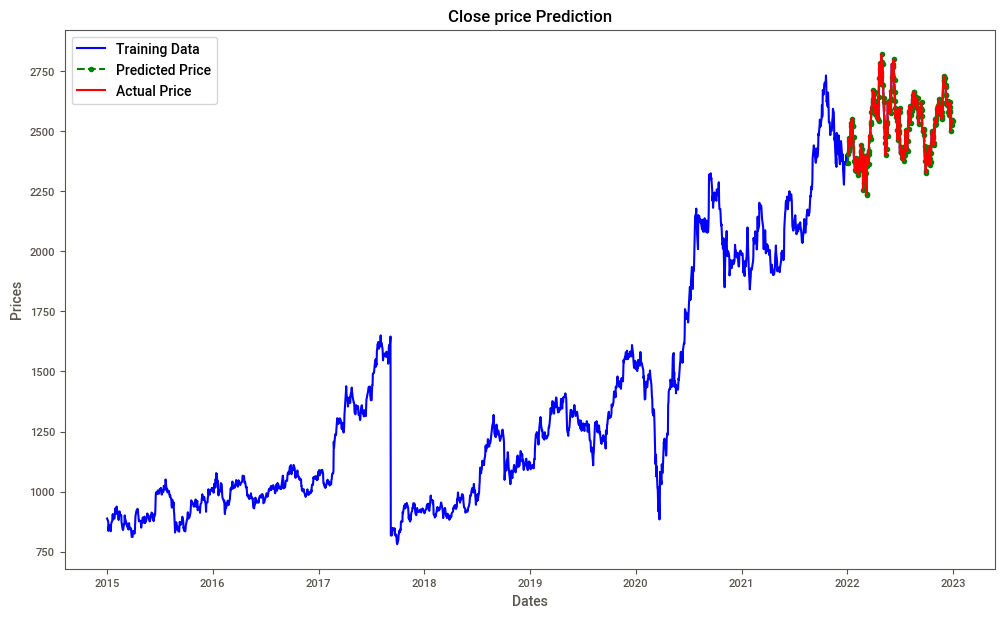

In [108]:
plt.figure(figsize=(12,7))
plt.plot(df3['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_ar.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_ar.index, test_ar['Close'], color='red', label='Actual Price')
plt.title('Close price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

### Sarimax

* **Extension of ARIMA Class of models**

In [75]:
df1=df[['Close','Date']]

In [76]:
df1

,Close,Date
0,887.90,2015-01-01
1,885.55,2015-01-02
2,875.85,2015-01-05
3,836.10,2015-01-06
4,854.30,2015-01-07
...,...,...
1977,2524.05,2022-12-26
1978,2544.70,2022-12-27
1979,2544.45,2022-12-28
1980,2543.30,2022-12-29


In [77]:
df1.set_index('Date')

,Close
Date,
2015-01-01,887.90
2015-01-02,885.55
2015-01-05,875.85
2015-01-06,836.10
2015-01-07,854.30
...,...
2022-12-26,2524.05
2022-12-27,2544.70
2022-12-28,2544.45


In [78]:
from statsmodels.tsa.stattools import adfuller
check = adfuller(df.Close.dropna())
print(f"ADF statistic: {check[0]}")
print(f"p-VALUE: {check[1]}") 

ADF statistic: -0.8634806423524898
p-VALUE: 0.79976082441645


* **Since P-Value is higher than 0.05 we need to go for order of diff to attain stationarity.** 

In [79]:
df1['Close_log'] = np.log(df['Close'])

In [80]:
Close_log=df1['Close_log']

In [81]:
df_diff=Close_log.diff().dropna()

In [82]:
df1['Close_logdiff']=df_diff

In [83]:
df1 = pd.DataFrame(df1)

In [84]:
df2 = df1.set_index('Date')

In [85]:
df2

,Close,Close_log,Close_logdiff
Date,,,
2015-01-01,887.90,6.788859,NaN
2015-01-02,885.55,6.786209,-0.002650
2015-01-05,875.85,6.775195,-0.011014
2015-01-06,836.10,6.728748,-0.046447
2015-01-07,854.30,6.750282,0.021534
...,...,...,...
2022-12-26,2524.05,7.833620,0.008694
2022-12-27,2544.70,7.841768,0.008148
2022-12-28,2544.45,7.841670,-0.000098


In [86]:
from pandas.core.frame import check_key_length
from statsmodels.tsa.stattools import adfuller
checkk = adfuller(df_diff.dropna())
print(f"ADF statistic: {checkk[0]}")
print(f"p-VALUE: {checkk[1]}") 

ADF statistic: -44.98927712259582
p-VALUE: 0.0


In [87]:
result=adfuller (df_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))
        
p=result[1]
if p>0.05:
    print('the data set not stationary')
else:
    print('the data set is stationary')

Test Statistic: -44.989277
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
the data set is stationary


* **ADF is generally negative value, the more the negative it is, the stronger the rejection of the hypothesis**

In [88]:
dt=pd.DataFrame(df_diff)

<AxesSubplot: xlabel='Date'>

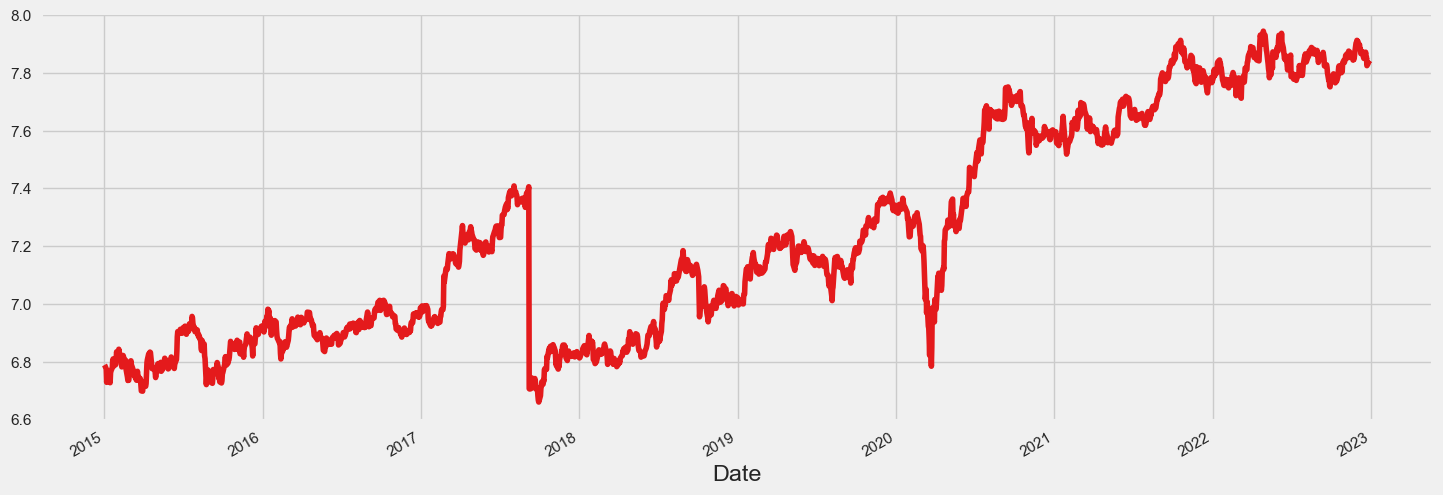

In [89]:
#dt.plot()
df2["Close_log"].plot(figsize=(16,6))

In [90]:
stepwise_fit=auto_arima(df_diff,start_p=1,start_q=1,
                       max_p=3,max_q=3,m=12,
                       start_P=0,seasonal=True,
                       d=None,D=1,trace=True,
                        error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-8733.364, Time=4.37 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-7730.587, Time=0.34 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-8220.518, Time=2.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.80 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-7732.586, Time=0.16 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-7727.789, Time=1.04 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-8776.088, Time=3.89 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-8219.057, Time=3.02 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=-8769.398, Time=9.17 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-8884.309, Time=9.60 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=9.64 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=-8891.152, Time=8.69 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=26.77 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=16.55 sec
 ARIMA(2,0,1)(2,1,2)[12] in

In [91]:
# Split data into train / test sets
train = df1.iloc[:len(df1)-248]
test = df1.iloc[len(df1)-248:] # set one year(12 months) for testing
   

In [92]:
#Fit a SARIMAX(2,0,0)x(2,1,0,12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],order = (2, 0, 0), seasonal_order =(2, 1, 0, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1734
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -8690.587
Date:                            Wed, 01 Mar 2023   AIC                          17391.173
Time:                                    12:19:15   BIC                          17418.429
Sample:                                         0   HQIC                         17401.257
                                           - 1734                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9920      0.028     35.556      0.000       0.937       1.047
ar.L2         -0.0309      0.028     -1.123      0.261      -0.085       0.023
ar.S.L12      -0.6205      0.005   -113.275      0.000      -0.631      -0.610
ar.S.L24      -0.3199      0.006    -54.852      0.000      -0.331      -0.309
sigma2      1409.2436      5.974    235.904      0.000    1397.535    1420.952
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1550232.00
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.31   Skew:                            -5.77
Prob(H) (two-sided):                  0.00   Kurtosis:                       149.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
# prediction of SARIMA model against the test set
start=len(train)
end=len(train)+len(test)-1

In [94]:
# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

<AxesSubplot: >

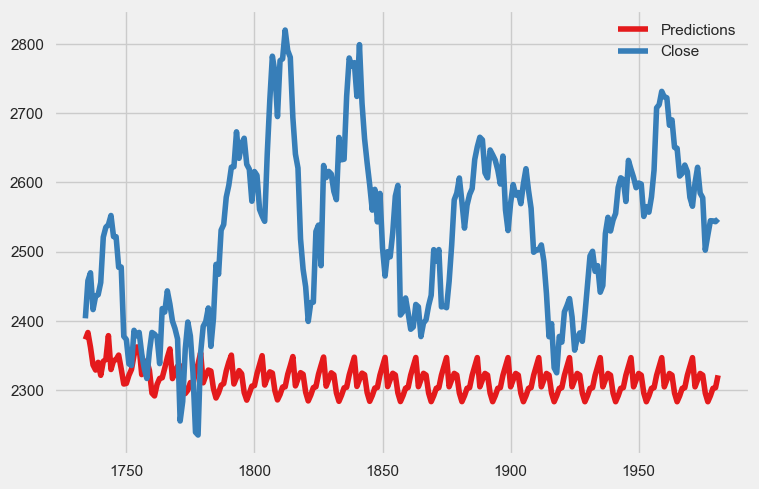

In [95]:
# plot predictions and actual values
predictions.plot(legend = True)
test['Close'].plot(legend = True)

In [96]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Close"], predictions)

245.7435425119373

In [97]:
#Forecast using ARIMA Model
# Train the model on the full dataset
model = SARIMAX(df['Close'], 
                        order = (2, 0, 0), 
                        seasonal_order =(2, 1, 0, 12))
result = model.fit()

In [98]:
# Forecast for the next 30days
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 30, 
                          typ = 'levels').rename('Forecast')

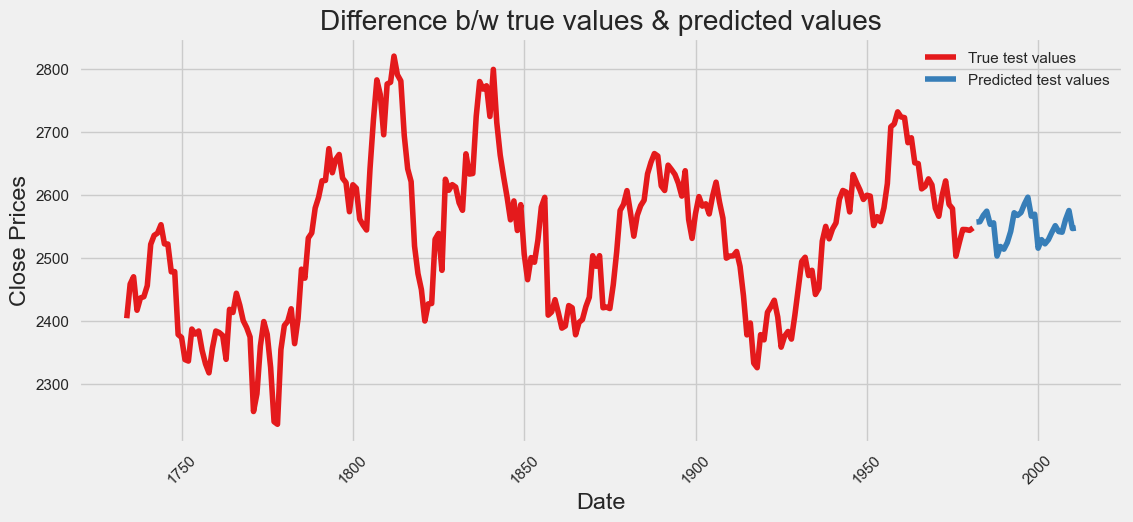

In [99]:
# Plot the forecast values
#plt.plot(test.Close, X_test)
#plt.plot(test.Close, forecast)

test['Close'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.xlabel("Date")
plt.ylabel("Close Prices")
plt.legend(['True test values', 'Predicted test values'])
plt.title("Difference b/w true values & predicted values")
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.show()